# Lending club case study by - Ashwin Kumar H

Purpose - The purpose of this document is to perfrom an explonatory data analysis on the lending club case.


The document aims to perform below,

1.   Data understanding.
2.   Data cleaning and manipulation.
3.   Data analysis.
4.   Presentation and recommendations.



In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import required libraries
**bold text**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re as re

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from datetime import date

#### Perfrom global settings

In [4]:
pd.options.display.float_format = '{:.2f}'.format 
pd.options.display.max_colwidth = 500

In [5]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

#### Functions  

In [6]:
# Functions to trim the strings on either side.
def trimData(x):
  return x.strip()

In [7]:
# Function to get basic dataset details like shape, rows, columns
def getBasicDataSetDetails(df):
  print("The shape of the dataset is ", df.shape)
  print("The number of rows dataset is ", df.shape[0])
  print("The number of columns in the dataset is ", df.shape[1])
 

In [8]:
# Function to provide a summary of how many int64, float, object and datetime columns exists
def getColumnDataTypes(df):
  dtypes = df.dtypes.to_frame().reset_index()
  dtypes.columns = ["Column","Data Types"]
  return dtypes 

In [9]:
# Function to get column names by datatype.
def getEachColumnsDataType(df,col_dtype):
  columnsList = [var for var in df.columns if df[var].dtype == col_dtype]
  print('columns of type', col_dtype , 'are', columnsList, end='')

In [10]:
# Function to plot histogram, probplot and boxplot for numerical analysis
def plotNumericalDiagnostics(df,var_col, no_of_bins):
  
  print(f"Total NA enties {df[var_col].isnull().mean()} \n")
  print(df[var_col].describe().to_frame().T,'\n')
  plt.figure(figsize=(18,6))
  
  plt.subplot(1,3,1)
  sns.histplot(df[var_col], bins=no_of_bins)
  plt.title(f'Histogram for varibale {var_col}')

  plt.subplot(1, 3, 2)
  sns.boxplot(y=df[var_col])
  plt.title(f'Boxplot for variable {var_col}')

  plt.subplot(1, 3, 3)
  stats.probplot(df[var_col], dist="norm", plot=plt)
  plt.title(f'Probplot for varibale {var_col}')

  plt.show()


In [11]:
# Function to get columns with nulls above a percentage
def getColumnsWithHighNulls(df,nullPercentage):
  x = df.isnull().mean().sort_values(ascending= False).apply(lambda x: x >= nullPercentage)
  return x[x == True].index

In [12]:
# Function to drop all numerical columns who just have NAN or zero in them
def dropNumericColumnsWithSumAsZero(df,dt_type):
  columnsList = [var for var in df.columns if df[var].dtype == dt_type and df[var].fillna(0).sum() == 0]
  df.drop(columns=columnsList, inplace=True)  

In [13]:
# Function to replace a character with other
def replaceCharcter(df, var_char, originalChar, replaceChar):
  df[var_char] = df[var_char].apply(lambda x: x.replace(originalChar,replaceChar))


In [14]:
# Function to displaya seborn countplot with hue
def drawCountPlotWithHue(df,var_x,var_hue,plt_title):
  sns.set(style="whitegrid")
  plt.figure(figsize=(8,5))
  total = float(len(df))
  ax = sns.countplot(x=var_x, hue=var_hue, data=df)
  plt.title(plt_title, fontsize=20)
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
  plt.show()

In [15]:
# Function to displaya seborn countplot with hue
def drawCountplotWithHue(df,var_x,var_hue):
  plt.figure(figsize=(18,10), dpi=70)
  sns.countplot(data=df, x=var_x,  hue=var_hue)
  plt.xticks(rotation = 90)
  plt.show()

In [16]:
# Function to displaya seborn countplot without hue
def drawCountPlotWithoutHue(df,var_x):
  plt.figure(figsize=(18,10), dpi=70)
  sns.countplot(data = df, x =var_x)
  plt.xticks(rotation = 90)
  plt.show()

In [17]:
# Function to convert object types to datetime types
def convertToDateTime(df,c_var):
  year = date.today().year
  year = '-' + str(year)
  df[c_var] = pd.to_datetime(df[c_var] + year)

In [18]:
# Function to categorize if loan is given in excess,less or equal
def categorizeloan(x):
  res = "unknown;"
  if (x==0):
    res = "equal"
  elif (x > 0):
    res = "excess"
  else:
    res = "less"
  return res;

### Data understanding 

##### Read the file and create the dataset

In [19]:
dfLendingclub = pd.read_csv("drive/MyDrive/loan.csv")

##### Get basic data of the dataset

In [20]:
getBasicDataSetDetails(dfLendingclub)
dfLendingclub.columns = dfLendingclub.columns.map(trimData)

The shape of the dataset is  (39717, 111)
The number of rows dataset is  39717
The number of columns in the dataset is  111


#### Get top 2 rows

In [21]:
dfLendingclub.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


##### No of floats, object, int type columns exists

In [22]:
getColumnDataTypes(dfLendingclub).groupby(['Data Types'])["Column"].count()  

Data Types
int64      13
float64    74
object     24
Name: Column, dtype: int64

####  Get all integer column names 

In [23]:
getEachColumnsDataType(dfLendingclub,'int64')

columns of type int64 are ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'policy_code', 'acc_now_delinq', 'delinq_amnt']

####  Get all float column names 

In [24]:
getEachColumnsDataType(dfLendingclub,'float64')

columns of type float64 are ['funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_deli

####  Get all string column names 

In [25]:
getEachColumnsDataType(dfLendingclub,'object')

columns of type object are ['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']

### Data cleaning

#### Remove unwanted columns

In [26]:
columnlist = ['id','url','desc','member_id','pymnt_plan','application_type','out_prncp', 'out_prncp_inv','policy_code'];
dfLendingclub.drop(columns=columnlist, inplace=True)

#### Remove columns that have atleast 60 percent null data

In [27]:
dfLendingclub.drop(columns=getColumnsWithHighNulls(dfLendingclub,0.6), inplace=True)

#### Remove numerical columns that have just NAN or zeroes

In [28]:
dropNumericColumnsWithSumAsZero(dfLendingclub,'int64')
dropNumericColumnsWithSumAsZero(dfLendingclub,'float64')

#### Remove % in int_rate column

In [29]:
replaceCharcter(dfLendingclub,"int_rate",'%','')

#### Remove months in term column

In [30]:
dfLendingclub["term"] = dfLendingclub["term"].map(trimData)
replaceCharcter(dfLendingclub,"term",'months','')
dfLendingclub["term"] = dfLendingclub["term"].astype(int)

### Check null data again

In [31]:
dfLendingclub.isnull().mean().sort_values(ascending=False).head(3)

emp_title              0.06
emp_length             0.03
pub_rec_bankruptcies   0.02
dtype: float64

#### Map loan status to binary

In [32]:
dfLendingclub = dfLendingclub[dfLendingclub["loan_status"] != "Current"]
dfLendingclub['loan_status'] = dfLendingclub.loan_status.map({'Fully Paid':1, 'Charged Off':0})

#### Remove duplicate rows

In [33]:
# check to see if any duplicate rows
len(dfLendingclub[dfLendingclub.duplicated() == True])

0

### Data manipulation and analysis

#### Analyse Data correlations

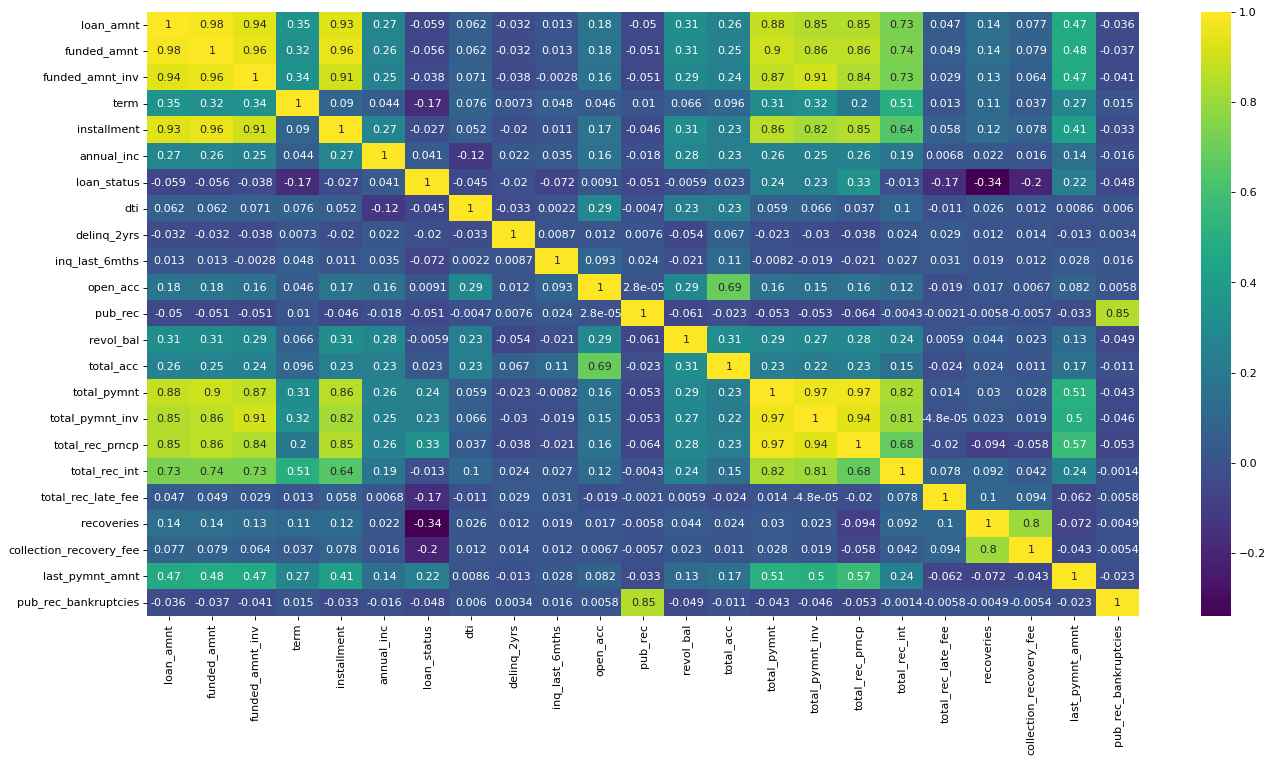

In [34]:
# We can see that there is very positive corelation between loan amount and installment
plt.figure(figsize=(20,10), dpi=80)
sns.heatmap(dfLendingclub.corr(),annot=True, cmap='viridis')
plt.show()

#### Add column which shows loan amount - funded amount

In [35]:
dfLendingclub["excess_loan"] = dfLendingclub["loan_amnt"] - dfLendingclub["funded_amnt"]
dfLendingclub["excess_loan"] = dfLendingclub["excess_loan"].apply(lambda x: categorizeloan(x))

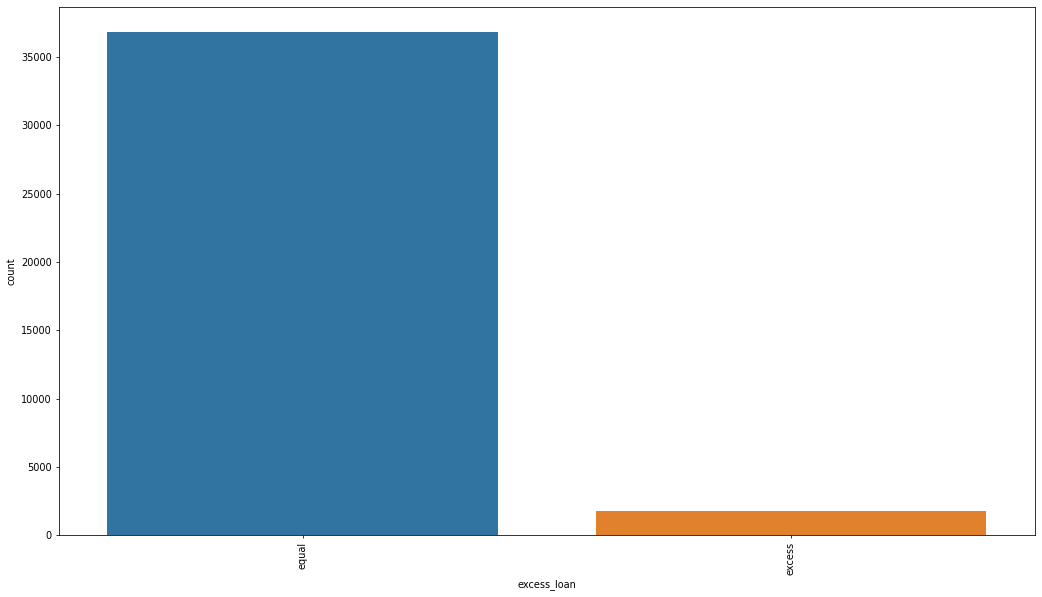

In [36]:
drawCountPlotWithoutHue(dfLendingclub,"excess_loan")

**From above it is clear that majority of people where provided loans based on their incomes only few were provided in excess**

#### Loan amount v/s funded amount

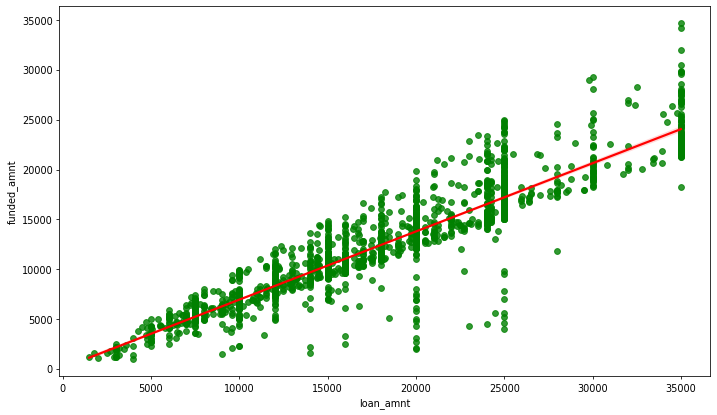

In [37]:
plt.figure(figsize=(12,7), dpi=70)
sns.regplot(x="loan_amnt", y="funded_amnt", 
            data=dfLendingclub[dfLendingclub["excess_loan"] == "excess"], scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'})
plt.show()

#### Excess loans provided

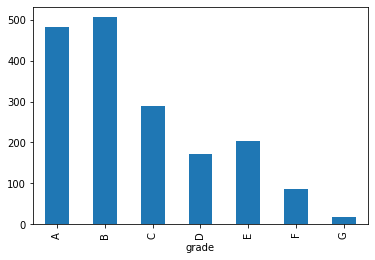

In [38]:
df_excess_loans_given = dfLendingclub[dfLendingclub["excess_loan"] == "excess"]
df_excess_loans_given.groupby(by=['grade'])['excess_loan'].count().plot(kind='bar')
plt.show()

#### Loans repaid ratio

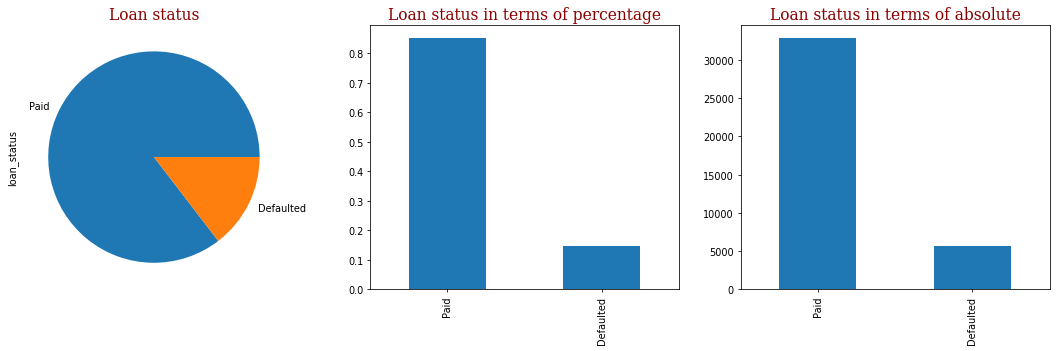

In [39]:
# Majority of the loans are repaid
plt.figure(figsize=(20, 5), dpi=70)

plt.subplot(1, 3, 1)
dfLendingclub["loan_status"].map({1:'Paid', 0:'Defaulted'}).value_counts('%').plot(kind='pie')
plt.title('Loan status', fontdict=font)

plt.subplot(1, 3, 2)
dfLendingclub["loan_status"].map({1:'Paid', 0:'Defaulted'}).value_counts('%').plot(kind='bar')
plt.title('Loan status in terms of percentage', fontdict=font)

plt.subplot(1, 3, 3)
dfLendingclub["loan_status"].map({1:'Paid', 0:'Defaulted'}).value_counts().plot(kind='bar')
plt.title('Loan status in terms of absolute', fontdict=font)

plt.subplots_adjust(left=0.15)
plt.show()

#### Short term loans are more preferred

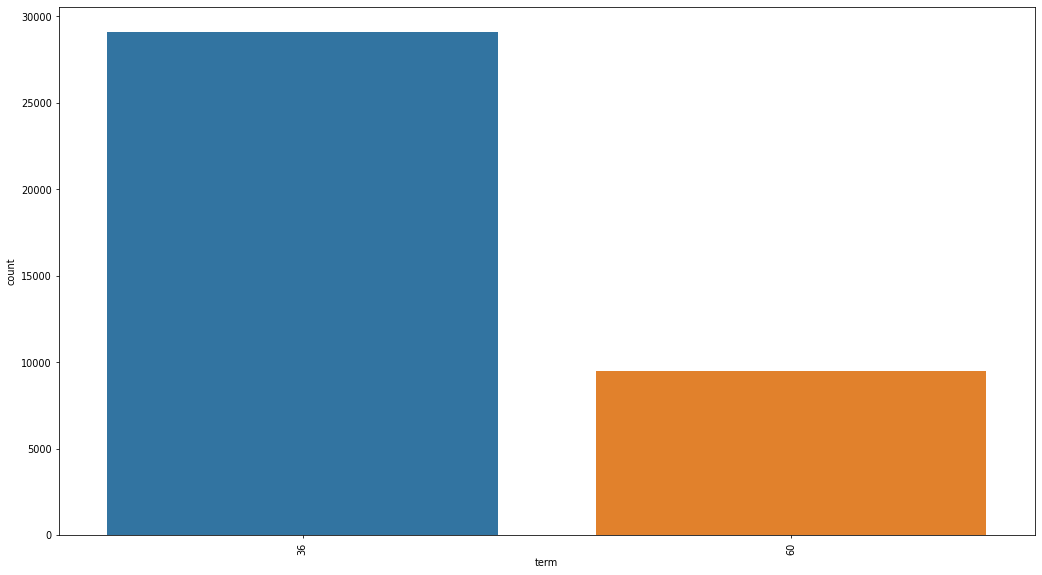

In [40]:
# Loans are preferred for shorter durations
drawCountPlotWithoutHue(dfLendingclub,'term')


#### All grades have defaulters

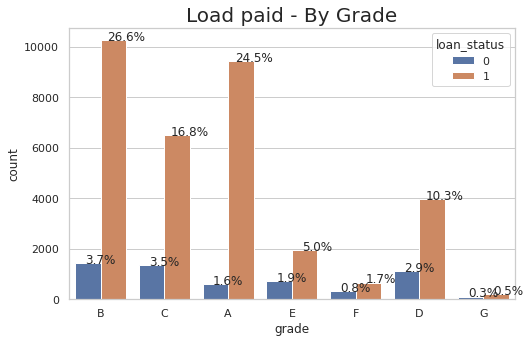

In [41]:
#We can make out that even though the grade is lower for category F, G they have a high paying rate when compared to B,D
drawCountPlotWithHue(dfLendingclub,'grade','loan_status','Load paid - By Grade')

#### Round of interest rates

In [42]:
# Let us round of interest rates to integers and see if higher interest rates relate to defaulting

df_interestRates = dfLendingclub[["int_rate","loan_status","grade","annual_inc","purpose"]]

In [43]:
dfLendingclub["int_rate"] = dfLendingclub["int_rate"].astype(float).round(0).astype(int)
dfLendingclub["loan_status_readable"] = dfLendingclub["loan_status"].map({1:'Paid', 0:'Defaulted'})

#### Interest rates less than 10% have least deafulters

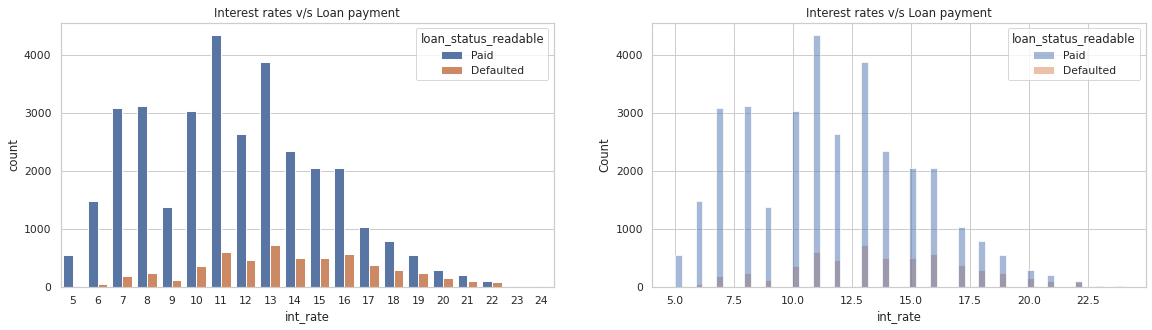

In [44]:
# We can conclude that interest rates below 10 % have less defaulters
plt.figure(figsize=(20, 5), dpi=70)
plt.subplot(1, 2, 1)
sns.countplot(data=dfLendingclub,x="int_rate",hue="loan_status_readable")
plt.title('Interest rates v/s Loan payment')


plt.subplot(1, 2, 2)
sns.histplot(data=dfLendingclub,x="int_rate",hue="loan_status_readable")
plt.title('Interest rates v/s Loan payment')

plt.show()

#### Grades v/s interest rates

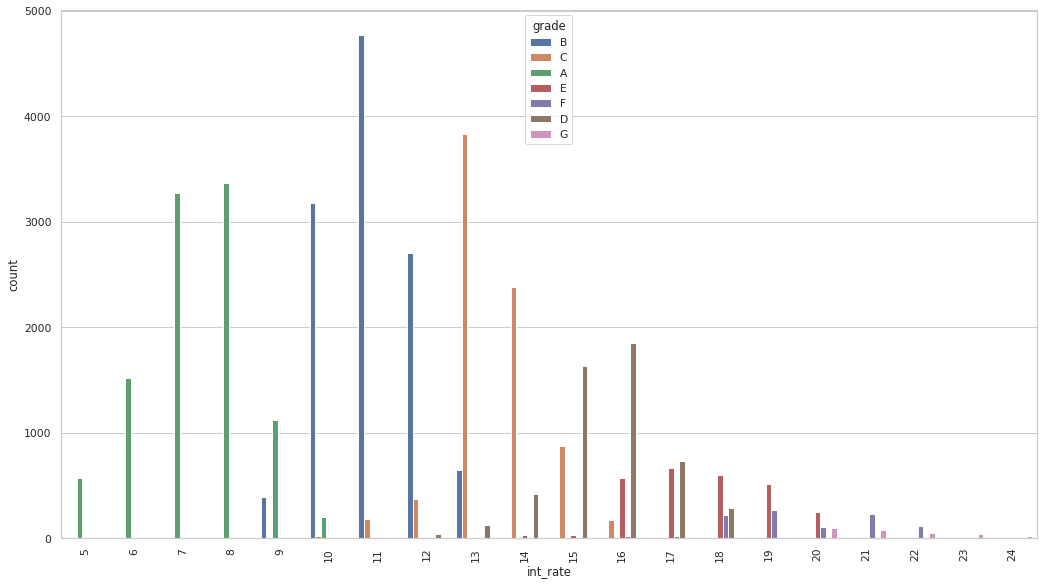

In [45]:
# interest rates are lower fro grade -A people
# plt.figure(figsize=(18,10), dpi=70)
# sns.countplot(data=df_interestRates,x="int_rate",hue="grade")
# plt.show()
drawCountplotWithHue(dfLendingclub,"int_rate","grade")

#### Interest rate distribution

Total NA enties 0.0 

            count  mean  std  min  25%   50%   75%   max
int_rate 38577.00 11.92 3.68 5.00 9.00 12.00 14.00 24.00 



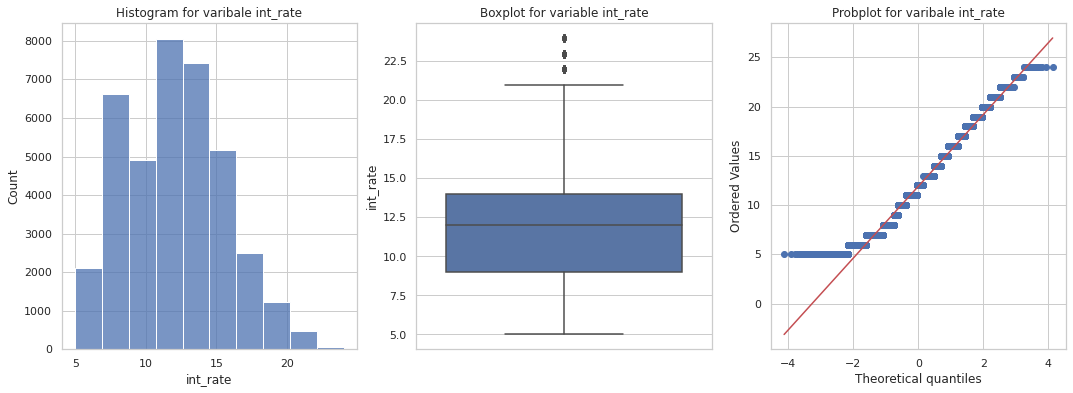

In [46]:
# Very close to Gausian - Once the interest rates cross 18% they are hardly takers
plotNumericalDiagnostics(dfLendingclub,"int_rate",10)

#### Higher loan amount is with very less population

Total NA enties 0.0 

             count     mean     std    min     25%     50%      75%      max
loan_amnt 38577.00 11047.03 7348.44 500.00 5300.00 9600.00 15000.00 35000.00 



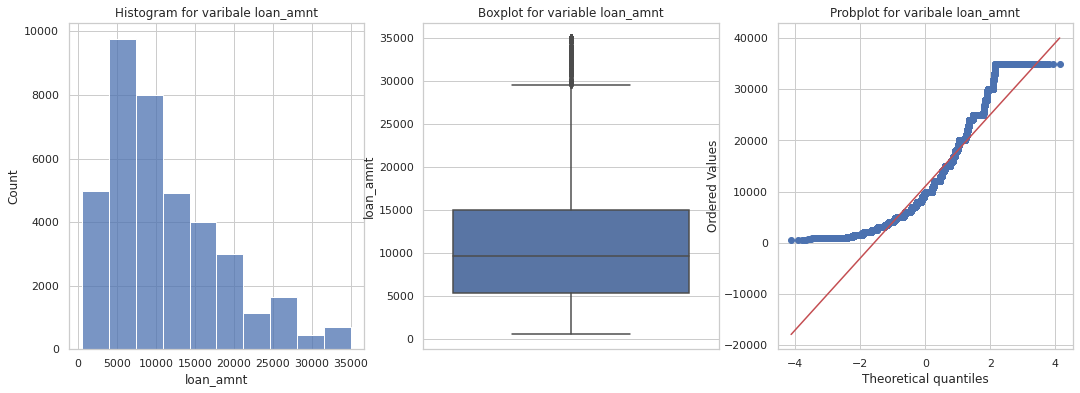

In [47]:
# Skewed distribution towards right - As the amount of loan increases the number of people decrease which is natural
plotNumericalDiagnostics(dfLendingclub,"loan_amnt",10)


#### Pub_rec analysis

Total NA enties 0.0 

           count  mean  std  min  25%  50%  75%  max
pub_rec 38577.00  0.06 0.24 0.00 0.00 0.00 0.00 4.00 



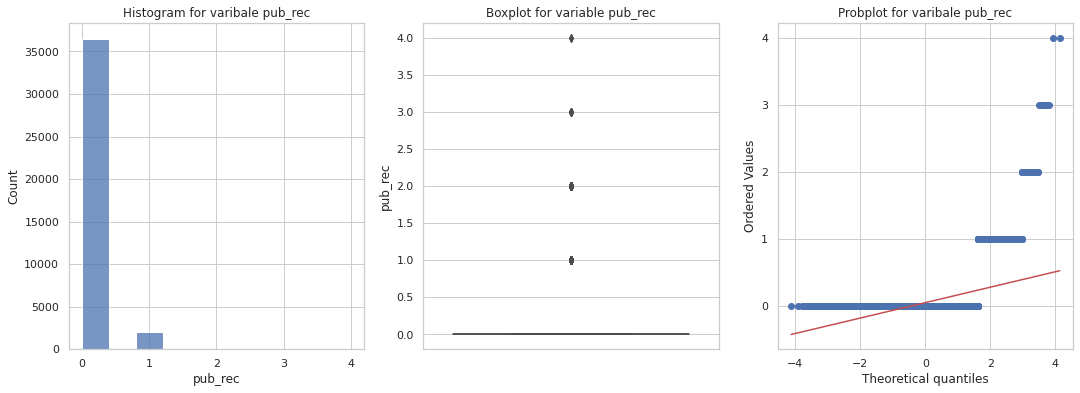

In [48]:
# Conclusion - Majority of the people do not have pub_rec which is why they are provided loans
plotNumericalDiagnostics(dfLendingclub,"pub_rec",10)

#### Term analysis

Total NA enties 0.0 

        count  mean   std   min   25%   50%   75%   max
term 38577.00 41.90 10.33 36.00 36.00 36.00 36.00 60.00 



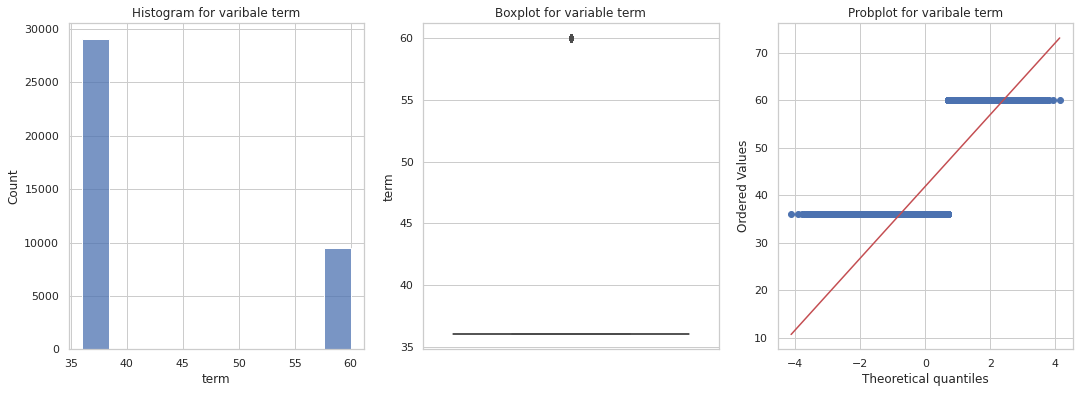

In [49]:
# Conclusion - People prefer shorter duration loans
plotNumericalDiagnostics(dfLendingclub,"term",10)

#### Defaulters vs loan amount distribution

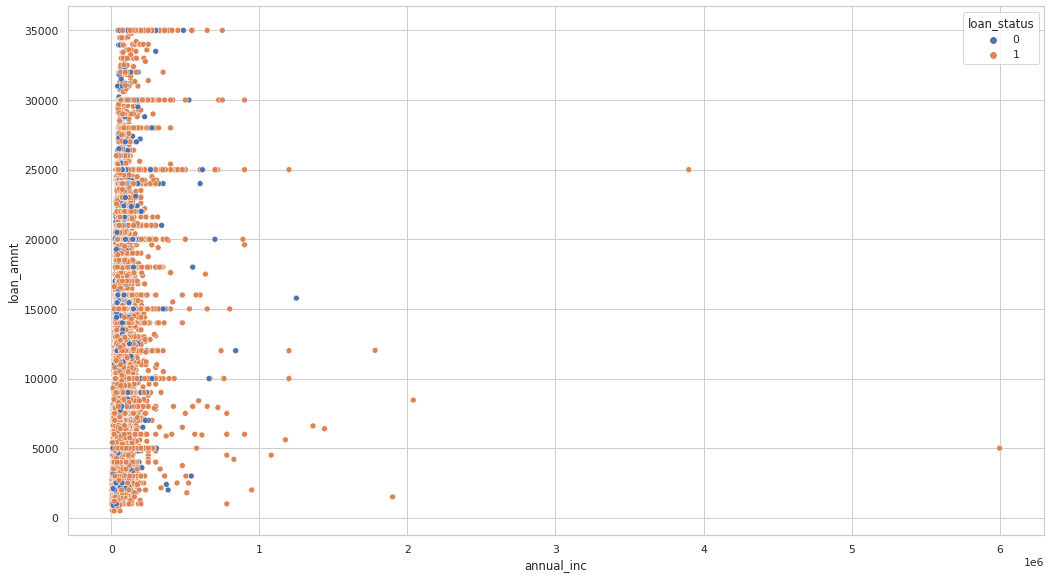

In [50]:
# We can see that we have defaulters when the amount is as low as 5000 or even when high as 35000
plt.figure(figsize=(18,10), dpi=70)
sns.scatterplot(data=dfLendingclub,x="annual_inc", y="loan_amnt", hue="loan_status")
plt.show()

#### Ratio of people against the interest rates

Text(0, 0.5, 'Number of People')

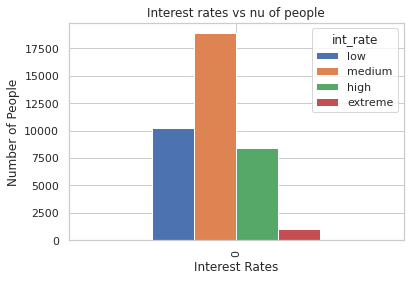

In [51]:
# Ratio of people against the interest rates
# Extreme and high interest rates - very less people
# Medium interest rates - Highest people
bins = pd.cut(dfLendingclub["int_rate"], bins=4, labels=("low", "medium", "high", "extreme"))
fig = dfLendingclub[["annual_inc"]].groupby(bins).agg(["count"]).transpose().reset_index().drop(columns=['level_0', 'level_1']).plot(kind='bar')
fig.set_title('Interest rates vs nu of people')
fig.set_xlabel('Interest Rates')
fig.set_ylabel('Number of People')


#### Add new column "int_rate_bins"

In [52]:
# Add nw column "int_rate_bins" into the mai dataframe
dfLendingclub["int_rate_bins"] = bins


#### Verified column analysis

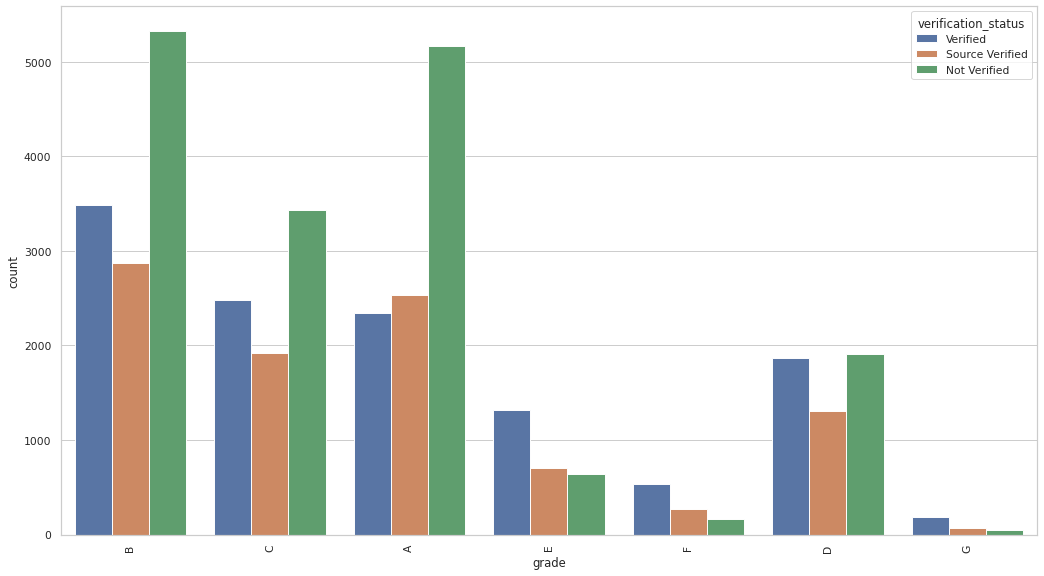

In [53]:
# Every grade has non verified members with highestbeing in B,A
drawCountplotWithHue(dfLendingclub,"grade","verification_status")

#### Grades v/s intrest rates analysis

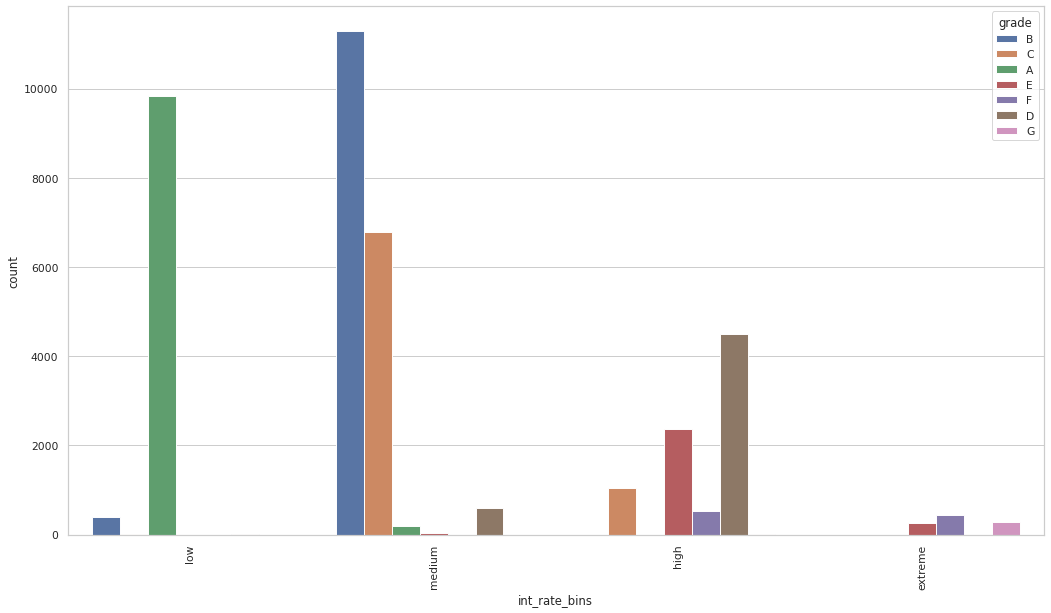

In [54]:
# Low interest rates are for grades 'A'
# Medium interest rates are for grades 'B,C'
# High interest rates are for grades 'D,E'
# Extreme interest rates are for grades 'F,G'
drawCountplotWithHue(dfLendingclub,"int_rate_bins","grade")

### Lower intrest rates are repaid better

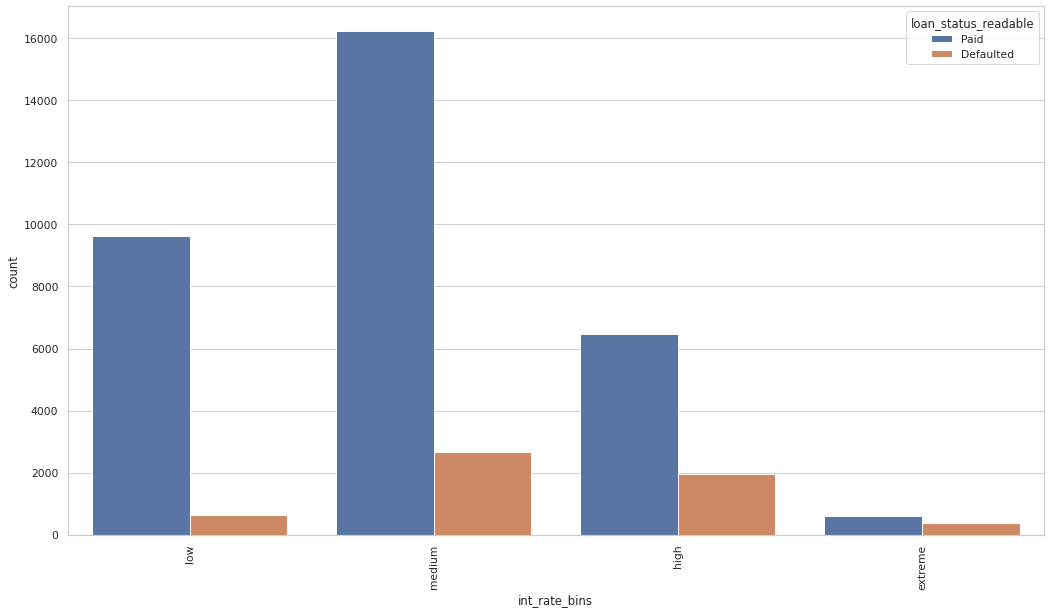

In [55]:
# Low interest rates have been mostly paid
# Extreme, High have highest defaulters in terms of ratio
# Medium also have high defaulters
drawCountplotWithHue(dfLendingclub,"int_rate_bins","loan_status_readable")

#### Loans are majorly taken for debt consolidation

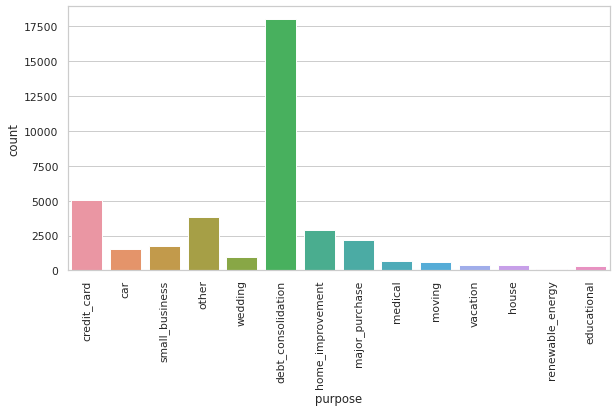

In [56]:
# highest loan is taken for debt consolidation
plt.figure(figsize=(10,5), dpi=70)
sns.countplot(data=dfLendingclub, x="purpose")
plt.xticks(rotation = 90)
plt.show()

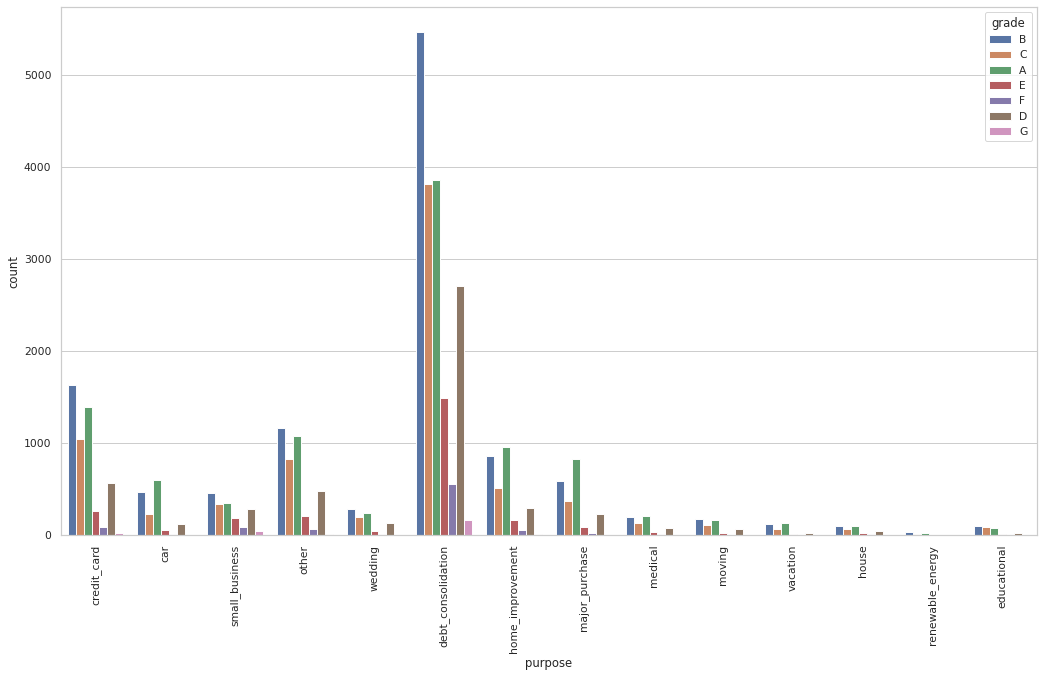

In [57]:
drawCountplotWithHue(dfLendingclub,"purpose","grade")

#### All grades take  loans

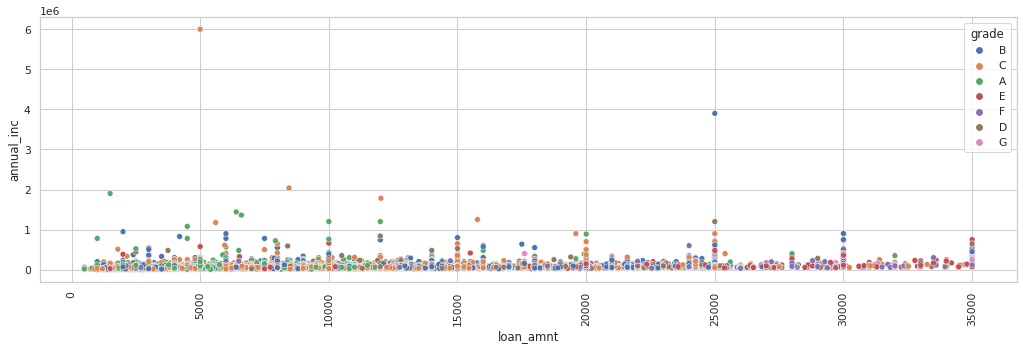

In [58]:
# People with low to high incomes take loans
plt.figure(figsize=(18,5), dpi=70)
sns.scatterplot(data=dfLendingclub, x="loan_amnt", y="annual_inc" , hue = "grade")
plt.xticks(rotation = 90)
plt.show()

#### Datetime analysis

In [59]:
convertToDateTime(dfLendingclub,'issue_d')
convertToDateTime(dfLendingclub,'last_pymnt_d')
convertToDateTime(dfLendingclub,'last_credit_pull_d')

In [60]:
def getDateParts(df,colname):
  df[colname+"month"] = df[colname].dt.month
  df[colname+"year"] = df[colname].dt.year
  df[colname+"dt"] = df[colname].dt.date
  df[colname+"dayOftheWeek"] = df[colname].dt.day_name


In [61]:
getDateParts(dfLendingclub,"issue_d")
getDateParts(dfLendingclub,"last_pymnt_d")
getDateParts(dfLendingclub,"last_credit_pull_d")

In [62]:
dfLendingclub.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'excess_loan',
       'loan_status_readable', 'int_rate_bins', 'issue_dmonth', 'issue_dyear',
       'issue_ddt', 'issue_ddayOftheWeek', 'last_pymnt_dmonth',
       'last_pymnt_dyear', 'last_pymnt_ddt', 'last_pymnt_ddayOftheWeek',
       'last_credit_pull_dmonth', 'last_credit_pull_dyear',
       'last_credit_p

### Loans were issued all days of the week

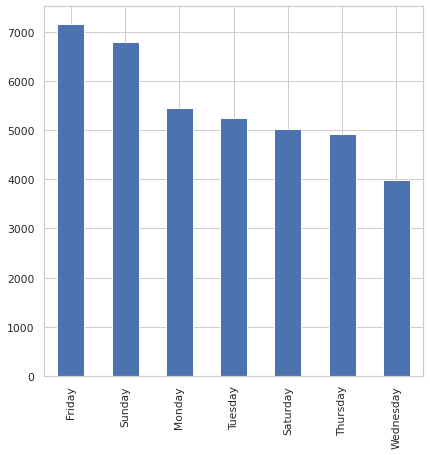

In [63]:
plt.figure(figsize=(7,7), dpi = 70)
dfLendingclub["issue_d"].dt.day_name().value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()


### Presenttion and Recommendations



1.   Interest rates less than 10% have less defaulters.
2.   Highest loan is taken by grade A, B
3.   They are defaulters in every grade.
4.   Most of the loans are taken for debt consolidation.
5.   The number of defaulters are less compared to people who re-pay.
6.   Loans are issued almost all days of the week.
7.   Loans above 18% have good ratio of defaulters.
8.   Loan amount, installment have a good direct corelation.
9.   The year is missing across all date time columns.
10.  Loans taken against credit cards have higher interest rates.
11.  Lower intest rates for A, B grades.
12.  High rates of intrest for grades F,G

